In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skimage.filters import threshold_otsu
from sklearn.mixture import GaussianMixture
from scipy.stats import chi2_contingency, fisher_exact

from pathlib import Path
import json
import os

In [2]:
base_dir = Path().resolve()
base_dir

PosixPath('/home/sadegh/projects/nencki_institute/notebooks')

## Patient Measurement Analysis

In [3]:
patient_1991 = base_dir.parent / "data/measurements_1991.xlsx"
patinet_3149 = base_dir.parent / "data/measurements_3149.csv"

In [4]:
# patient 1991
raw = pd.read_excel(patient_1991, header=None)
header = raw.iloc[0,0].split(";")
raw.columns = header
raw["Cell: ALDH1L1: Median"] = raw["Cell: ALDH1L1: Median"].astype(str).str.extract(r"([-+]?\d*\.?\d+)")[0]
raw["Cell: ALDH1L1: Median"] = pd.to_numeric(raw["Cell: ALDH1L1: Median"], errors="coerce")
raw = raw.iloc[3:,:]
df_1991 = raw.reset_index(drop=True)
df_1991

,Image,Object ID,Object type,Name,Classification,Parent,ROI,Centroid X µm,Centroid Y µm,Cell: Area µm^2,...,Cell: LGALS3: Mean,Cell: LGALS3: Median,Cell: PD-1: Mean,Cell: PD-1: Median,Cell: MOG: Mean,Cell: MOG: Median,Cell: SPP1: Mean,Cell: SPP1: Median,Cell: ALDH1L1: Mean,Cell: ALDH1L1: Median
0,pHGG_1991_3149_Scan1.qptiff - resolution #1,533b814e-ea83-4609-b853-803f539f6d7a,Cell,NaN,NaN,Annotation,Polygon,9802.9,29434.9,7.1667,...,5.1875,5.0,0.0312,0.0,0.0625,0.0,0.0000,0.0,91.9375,87.5
1,pHGG_1991_3149_Scan1.qptiff - resolution #1,df62610a-34eb-4783-a4d5-cf0e1422ea4c,Cell,NaN,NaN,Annotation,Polygon,9811.3,29444.0,41.3081,...,3.9057,4.0,0.3145,0.0,0.0189,0.0,0.0440,0.0,78.6792,79.0
2,pHGG_1991_3149_Scan1.qptiff - resolution #1,b1aa9611-8c01-4076-8be8-41c004b0dd6c,Cell,NaN,NaN,Annotation,Polygon,9805.1,29451.4,49.0177,...,4.0950,4.0,0.5250,0.0,0.0100,0.0,0.1850,0.0,88.2250,95.5
3,pHGG_1991_3149_Scan1.qptiff - resolution #1,878f8f4d-2a58-4d32-b2ae-e61f110c4e96,Cell,NaN,NaN,Annotation,Polygon,9802.0,29467.5,54.7391,...,4.1396,4.0,0.4910,0.0,1.2477,0.0,0.1847,0.0,97.0045,101.0
4,pHGG_1991_3149_Scan1.qptiff - resolution #1,859744c8-8e91-4edf-991b-8e367fc810c1,Cell,NaN,NaN,Annotation,Polygon,9813.3,29470.4,59.0107,...,3.9339,4.0,0.2467,0.0,0.0044,0.0,0.1013,0.0,68.8987,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31405,pHGG_1991_3149_Scan1.qptiff - resolution #1,1d81db57-b450-4f7d-8e61-29a7499964f2,Cell,NaN,NaN,Annotation,Polygon,13444.7,28702.3,53.1763,...,5.9628,6.0,0.9860,1.0,0.0326,0.0,0.1721,0.0,100.4512,84.0
31406,pHGG_1991_3149_Scan1.qptiff - resolution #1,97110e29-2c24-4b4d-9d98-4b607c2285ca,Cell,NaN,NaN,Annotation,Polygon,12702.9,27801.7,58.2237,...,4.4895,4.0,0.5021,0.0,0.0042,0.0,0.4226,0.0,19.0586,20.0
31407,pHGG_1991_3149_Scan1.qptiff - resolution #1,554a57d3-7267-46e4-a09f-5e8b53d95599,Cell,NaN,NaN,Annotation,Polygon,13245.2,28465.8,13.0345,...,5.8302,6.0,0.8302,1.0,0.0566,0.0,0.9245,1.0,87.2076,86.0
31408,pHGG_1991_3149_Scan1.qptiff - resolution #1,19de3283-0860-454a-960e-a775eb1b9ca6,Cell,NaN,NaN,Annotation,Polygon,12396.3,28610.3,65.7426,...,9.6525,9.0,0.9151,1.0,0.0077,0.0,0.5019,0.0,75.1583,64.0


In [5]:
# patient_3149
raw = pd.read_csv(patinet_3149, header=None)   
header = raw.iloc[0, 0].split(";")
data = raw.iloc[1:, 0].str.split(";", expand=True)
data.columns = header
df_3149 = data.reset_index(drop=True)
df_3149

,Image,Object ID,Object type,Name,Classification,Parent,ROI,Centroid X µm,Centroid Y µm,Cell: Area µm^2,...,Cell: LGALS3: Mean,Cell: LGALS3: Median,Cell: PD-1: Mean,Cell: PD-1: Median,Cell: MOG: Mean,Cell: MOG: Median,Cell: SPP1: Mean,Cell: SPP1: Median,Cell: ALDH1L1: Mean,Cell: ALDH1L1: Median
0,pHGG_1991_3149_Scan1.qptiff - resolution #1,84099414-3e62-425a-9085-282e3e1a21ff,Cell,,,Annotation,Polygon,11200,8391.1,15.3048,...,4.1077,4,0.4769,0,0,0,0.0923,0,21.4923,21
1,pHGG_1991_3149_Scan1.qptiff - resolution #1,fc30177d-09e0-409e-992d-74629ce175ed,Cell,,,Annotation,Polygon,11186.4,8393.8,10.7628,...,3.3478,3,0.0435,0,0,0,0,0,21.087,21
2,pHGG_1991_3149_Scan1.qptiff - resolution #1,310dabff-3574-4189-95d3-f3d84678f548,Cell,,,Annotation,Polygon,11177.7,8396.1,43.6511,...,3.7127,4,0.5249,0,0,0,0.0718,0,18.2376,18
3,pHGG_1991_3149_Scan1.qptiff - resolution #1,0ee07499-3690-418e-9e36-7aad91ae371e,Cell,,,Annotation,Polygon,11203.9,8394.9,68.7307,...,5.1295,5,0.2662,0,0,0,0.0324,0,29.7914,27
4,pHGG_1991_3149_Scan1.qptiff - resolution #1,fb7cd2e6-4853-4c72-9947-1d818f5dd069,Cell,,,Annotation,Polygon,11191,8396.8,83.7356,...,4.7654,5,0.0587,0,0,0,0.7683,0,15.6246,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210548,pHGG_1991_3149_Scan1.qptiff - resolution #1,45dcefff-1dc0-4f66-b57a-673b3f3f623b,Cell,,,Annotation,Polygon,14876.7,13381.4,47.9196,...,7.715,8,1.1192,1,0.0207,0,0.1347,0,170.1347,167
210549,pHGG_1991_3149_Scan1.qptiff - resolution #1,6405fd5b-8e04-49ca-a121-fc0cc80d4771,Cell,,,Annotation,Polygon,15572.4,13598.9,30.4987,...,2.9297,3,0.8438,1,0.0234,0,0.1094,0,148.2266,142
210550,pHGG_1991_3149_Scan1.qptiff - resolution #1,ed7ac5ab-f6f4-4ff5-bb8c-b0b69f2f9ea2,Cell,,,Annotation,Polygon,14641,14067.6,61.5644,...,2.1734,2,1.0927,1,0.0081,0,0.1452,0,134.9839,135
210551,pHGG_1991_3149_Scan1.qptiff - resolution #1,d8ac877d-1955-4fc6-8f9d-93d86c423df5,Cell,,,Annotation,Polygon,14772.3,13626,23.1197,...,2.44,2,0.59,0,0,0,0.06,0,251.36,255


## EDA on datasets

#### Define which patient to analyze

In [6]:
data = df_3149 #  df_3149 or df_1991

In [7]:
for col in data.columns:
    if "Mean" in col or "Median" in col:
        data[col] = pd.to_numeric(data[col], errors="coerce")

In [8]:
data.columns

Index(['Image', 'Object ID', 'Object type', 'Name', 'Classification', 'Parent',
       'ROI', 'Centroid X µm', 'Centroid Y µm', 'Cell: Area µm^2',
       'Cell: Length µm', 'Cell: Circularity', 'Cell: Solidity',
       'Nucleus: DAPI: Mean', 'Nucleus: DAPI: Median', 'Nucleus: H3K27M: Mean',
       'Nucleus: H3K27M: Median', 'Nucleus: Ki67: Mean',
       'Nucleus: Ki67: Median', 'Cell: GLUT1: Mean', 'Cell: GLUT1: Median',
       'Cell: GFAP: Mean', 'Cell: GFAP: Median', 'Cell: CD163: Mean',
       'Cell: CD163: Median', 'Cell: SOX4: Mean', 'Cell: SOX4: Median',
       'Cell: CD31: Mean', 'Cell: CD31: Median', 'Cell: TMEM119: Mean',
       'Cell: TMEM119: Median', 'Cell: HLA-A: Mean', 'Cell: HLA-A: Median',
       'Cell: CD68: Mean', 'Cell: CD68: Median', 'Cell: CD20: Mean',
       'Cell: CD20: Median', 'Cell: CD4: Mean', 'Cell: CD4: Median',
       'Cell: CD8: Mean', 'Cell: CD8: Median', 'Cell: GPNMB: Mean',
       'Cell: GPNMB: Median', 'Cell: PD-L1: Mean', 'Cell: PD-L1: Median',
     

### Apply Thresholding Methods on Markers

In [9]:
def compute_thresholds(data, markers, 
                       methods=["otsu", "gmm", "percentile", "zscore", "log_percentile", "robust_zscore", "manual"],
                       percentile=95, 
                       zscore=2, 
                       manual_thr=None, 
                       save_plots=True,
                       outdir="thresholds"):
    """
    Compute thresholds for multiple markers with different methods.
    Extended with log-percentile and robust-zscore.
    """

    if save_plots:
        os.makedirs(outdir, exist_ok=True)

    results = []
    TH = {}

    for marker in markers:
        TH[marker] = {}

        for compartment in ["Cell", "Nucleus"]:
            col = f"{compartment}: {marker}: Mean"
            if col not in data.columns:
                continue

            values = data[col].dropna().values
            if len(values) == 0:
                continue

            thr_dict = {"Marker": marker, "Compartment": compartment}
            TH[marker][compartment] = {}

            for method in methods:
                thr = None

                if method == "otsu":
                    thr = threshold_otsu(values)

                elif method == "gmm":
                    gmm = GaussianMixture(n_components=2, random_state=42)
                    gmm.fit(values.reshape(-1, 1))
                    means = np.sort(gmm.means_.flatten())
                    thr = np.mean(means)

                elif method == "percentile":
                    thr = np.percentile(values, percentile)

                elif method == "zscore":
                    mean = values.mean()
                    std = values.std()
                    thr = mean + zscore * std

                elif method == "log_percentile":
                    log_vals = np.log1p(values)
                    thr_log = np.percentile(log_vals, percentile)
                    thr = np.expm1(thr_log)  

                elif method == "robust_zscore":
                    median = np.median(values)
                    mad = np.median(np.abs(values - median))
                    thr = median + zscore * mad

                elif method == "manual":
                    if manual_thr is None:
                        continue
                    elif isinstance(manual_thr, (int, float)):
                        thr = manual_thr
                    elif isinstance(manual_thr, dict):
                        if marker in manual_thr:
                            if isinstance(manual_thr[marker], dict):
                                thr = manual_thr[marker].get(compartment, None)
                                if thr is None:
                                    continue
                            else:
                                thr = manual_thr[marker]
                        else:
                            continue
                    else:
                        continue

                else:
                    continue

                if thr is None:
                    continue

                thr_dict[method] = thr
                TH[marker][compartment][method] = thr

                # ---------------- plot & save ----------------
                if save_plots:
                    plt.figure(figsize=(6,4))
                    plt.hist(values, bins=100, alpha=0.7, color="gray")
                    plt.axvline(thr, color="red", linestyle="--", label=f"{method} = {thr:.2f}")
                    plt.title(f"{marker} ({compartment}) - {method}")
                    plt.xlabel("Intensity")
                    plt.ylabel("Cell count")
                    plt.legend()
                    fname = f"{marker}_{compartment}_{method}.png".replace(" ", "_")
                    plt.savefig(os.path.join(outdir, fname), dpi=150, bbox_inches="tight")
                    plt.close()

            results.append(thr_dict)

    thresholds_df = pd.DataFrame(results).set_index(["Marker", "Compartment"])
    return thresholds_df, TH


In [10]:
def plot_all_thresholds(values, thresholds_dict, marker, compartment, outdir, focus_percentile=80, show=True):
    """
    values: intensity values (list or np.array)
    thresholds_dict: dict of {method_name: threshold_value}
    marker: e.g. "SPP1"
    compartment: e.g. "cell"
    outdir: output directory
    focus_percentile: zoom 
    """

    os.makedirs(outdir, exist_ok=True)

    plt.figure(figsize=(6,4))
    plt.hist(values, bins=100, alpha=0.7, color="gray")

    method_colors = {
        "Otsu": "red",
        "GMM": "blue",
        "Percentile": "green",
        "Z-score": "purple",
        "Log Percentile": "brown",
        "Robust Z-score": "cyan",
        "Manual": "black"
    }

    for method, thr in thresholds_dict.items():
        color = method_colors.get(method, "orange") 
        plt.axvline(thr, linestyle="--", color=color, label=f"{method} = {thr:.2f}")

    xmax = np.percentile(values, focus_percentile)
    plt.xlim(0, xmax)

    plt.title(f"{marker} ({compartment}) - all thresholds")
    plt.xlabel("Intensity")
    plt.ylabel("Cell count")
    plt.legend()

    fname = f"{marker}_{compartment}_all.png".replace(" ", "_")
    plt.savefig(os.path.join(outdir, fname), dpi=150, bbox_inches="tight")

    if show:
        plt.show()

    plt.close()

In [11]:
markers = ["SPP1", "TMEM119", "CD68", "CD45", "LGALS3", "H3K27M", "GLUT1", "CD31"]

# Manual thresholds 1991:
#  "SPP1": 0.49, # otsu
# "TMEM119": 30, # manual
# "CD68": 9.8, # otsu
# "CD45": 27.8, # otsu
# "LGALS3": 5.76, # otsu
# "H3K27M": 40, # manual
# "GLUT1": 10 , # manual
# "CD31": 6.02 # otsu

# Manual thresholds 3149:
#  "SPP1": 0.52, # otsu
# "TMEM119": 33, # manual
# "CD68": 14.84, # otsu
# "CD45": 38, # manual
# "LGALS3": 4.25 , # otsu
# "H3K27M": 50 , # manual
# "GLUT1": 25 , # manual
# "CD31": 6.48 # manual


thresholds_df, TH = compute_thresholds(data, 
                                       markers,
                                       methods=["otsu", "gmm", "percentile", "zscore", 
                                                "log_percentile", "robust_zscore", "manual"],
                                       percentile=90,
                                       zscore=2,
                                       manual_thr={
                                        "SPP1": 0.52, # otsu
                                        "TMEM119": 33, # manual
                                        "CD68": 14.84, # otsu
                                        "CD45": 38, # manual
                                        "LGALS3": 4.25 , # otsu
                                        "H3K27M": 50 , # manual
                                        "GLUT1": 25 , # manual
                                        "CD31": 6.48 # manual
                                       },
                                       save_plots=True
                                       )

thresholds_df

,,otsu,gmm,percentile,zscore,log_percentile,robust_zscore,manual
Marker,Compartment,,,,,,,
SPP1,Cell,0.528302,0.448752,0.44910,0.855776,0.44910,0.31480,0.52
TMEM119,Cell,60.748763,33.286221,55.92197,86.627614,55.92197,13.25770,33.00
CD68,Cell,14.844497,10.044438,14.39914,22.184799,14.39914,8.26740,14.84
CD45,Cell,37.055000,28.571413,38.39005,53.196863,38.39005,23.01920,38.00
LGALS3,Cell,4.253062,3.937955,6.97777,9.146005,6.97777,5.75610,4.25
H3K27M,Nucleus,77.158909,54.337608,130.04624,156.640235,130.04624,95.65280,50.00
GLUT1,Cell,80.185547,37.916212,23.03139,80.912212,23.03139,10.42910,25.00
CD31,Cell,12.859242,6.484836,4.10160,10.759035,4.10160,3.37955,6.48


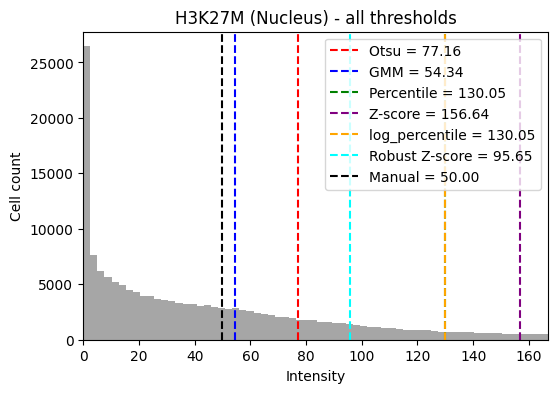

In [12]:
marker = "H3K27M"
compartment = "Nucleus"
row = thresholds_df.loc[(marker, compartment)]
 
thresholds = {
    "Otsu": row["otsu"],
    "GMM": row["gmm"],
    "Percentile": row["percentile"],
    "Z-score": row["zscore"],
    "log_percentile": row["log_percentile"],
    "Robust Z-score": row["robust_zscore"],
    "Manual": row["manual"]
}


col = f"{compartment}: {marker}: Mean"
values = data[col].dropna().values.reshape(-1, 1)
 
plot_all_thresholds(values, thresholds, marker, compartment, "output/", focus_percentile=95, show=True)

In [13]:
def pos(data, marker, method="otsu", compartment="Cell"):
    """
    Return boolean mask of positive cells for a given marker.
    
    Parameters
    ----------
    data : pd.DataFrame
        QuPath measurement table.
    marker : str
        Marker name, e.g. "CD68"
    method : str
        Thresholding method key, e.g. "otsu", "gmm"
    compartment : str
        "Cell" or "Nucleus"
    """
    col = f"{compartment}: {marker}: Mean"
    thr = TH[marker][compartment][method]
    return data[col] > thr

In [15]:
# Groups
method = "manual"  # "otsu", "gmm", "percentile", "zscore", "log_percentile", "robust_zscore", "manual"

tmem119 = pos(data, "TMEM119", method, "Cell") & \
                 pos(data, "CD68", method, "Cell") & \
                 pos(data, "CD45", method, "Cell")

lgals3 = pos(data, "LGALS3", method, "Cell") & \
                  pos(data, "CD68", method, "Cell") & \
                  pos(data, "CD45", method, "Cell")

h3k27m = pos(data, "H3K27M", method, "Nucleus")

hypoxic = pos(data, "GLUT1", method, "Cell") & (~pos(data, "CD31", method, "Cell"))

# Results dictionary
results = {}

results["SPP1 in TMEM119+ CD68+ CD45+"] = (
    pos(data.loc[tmem119], "SPP1", method, "Cell").mean() * 100
)

results["SPP1 in TMEM119+ CD68+ CD45+ GLUT1+ CD31-"] = (
    pos(data.loc[tmem119 & hypoxic], "SPP1", method, "Cell").mean() * 100
)

results["SPP1 in LGALS3+ CD68+ CD45+"] = (
    pos(data.loc[lgals3], "SPP1", method, "Cell").mean() * 100
)

results["SPP1 in LGALS3+ CD68+ CD45+ GLUT1+ CD31-"] = (
    pos(data.loc[lgals3 & hypoxic], "SPP1", method, "Cell").mean() * 100
)

results["SPP1 in H3K27M+"] = (
    pos(data.loc[h3k27m], "SPP1", method, "Cell").mean() * 100
)

results["SPP1 in H3K27M+ GLUT1+ CD31-"] = (
    pos(data.loc[h3k27m & hypoxic], "SPP1", method, "Cell").mean() * 100
)


# Summary DataFrame
summary = pd.DataFrame.from_dict(results, orient="index", columns=["% SPP1+"])
summary["% SPP1+"] = summary["% SPP1+"].fillna("No cells")
summary.reset_index(inplace=True, names=["Group"])
summary

,Group,% SPP1+
0,SPP1 in TMEM119+ CD68+ CD45+,42.107012
1,SPP1 in TMEM119+ CD68+ CD45+ GLUT1+ CD31-,38.297872
2,SPP1 in LGALS3+ CD68+ CD45+,35.665323
3,SPP1 in LGALS3+ CD68+ CD45+ GLUT1+ CD31-,25.238095
4,SPP1 in H3K27M+,6.918433
5,SPP1 in H3K27M+ GLUT1+ CD31-,4.166667


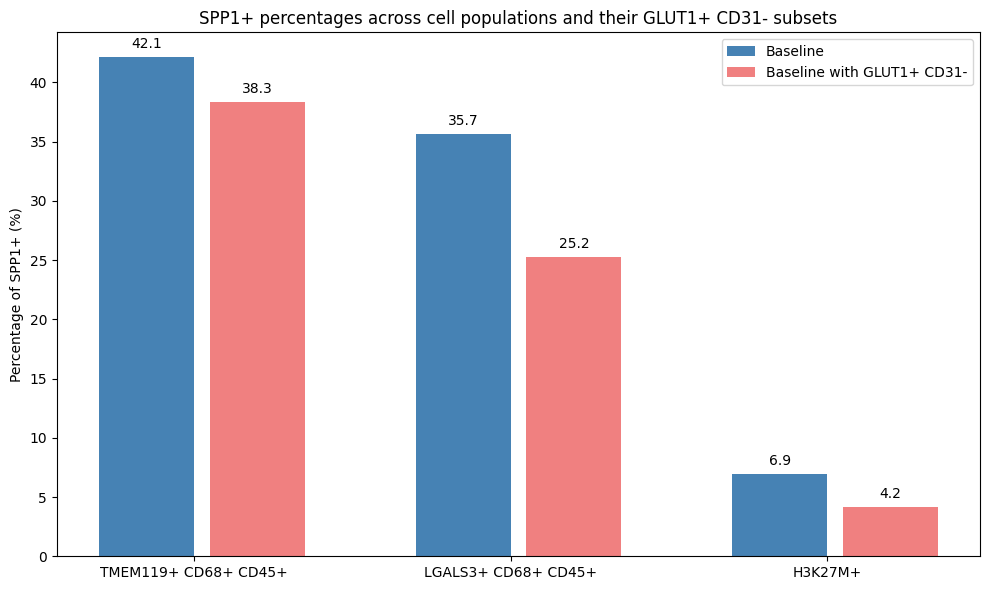

In [16]:
groups = [
    "TMEM119+ CD68+ CD45+", 
    "TMEM119+ CD68+ CD45+ GLUT1+ CD31-",
    "LGALS3+ CD68+ CD45+", 
    "LGALS3+ CD68+ CD45+ GLUT1+ CD31-",
    "H3K27M+", 
    "H3K27M+ GLUT1+ CD31-"
]
values = summary["% SPP1+"]

pairs = [(0,1), (2,3), (4,5)]

plt.figure(figsize=(10,6))

for i, (a, b) in enumerate(pairs):
    x = np.array([i, i+0.35])   
    y = [values[a], values[b]]
    
    plt.bar(x[0], y[0], width=0.3, color="steelblue", label="Baseline" if i == 0 else "")
    plt.bar(x[1], y[1], width=0.3, color="lightcoral", label="Baseline with GLUT1+ CD31-" if i == 0 else "")

    plt.text(x[0], y[0] + 0.5, f"{y[0]:.1f}", ha='center', va='bottom', fontsize=10)
    plt.text(x[1], y[1] + 0.5, f"{y[1]:.1f}", ha='center', va='bottom', fontsize=10)


plt.xticks([i+0.15 for i in range(len(pairs))],
           ["TMEM119+ CD68+ CD45+", "LGALS3+ CD68+ CD45+", "H3K27M+"],
           rotation=0)

plt.ylabel("Percentage of SPP1+ (%)")
plt.title("SPP1+ percentages across cell populations and their GLUT1+ CD31- subsets")
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
def test_significance(data, group_mask, marker="SPP1", method="otsu", compartment="Cell"):
    """
    Compare %SPP1+ between baseline and hypoxic subsets.
    
    Parameters
    ----------
    data : pd.DataFrame
        QuPath measurement table
    group_mask : dict
        Dictionary with masks, e.g. {"microglia": mask1, "microglia_hypoxic": mask2}
    marker : str
        Marker to test positivity for (default="SPP1")
    method : str
        Thresholding method key, e.g. "otsu"
    compartment : str
        "Cell" or "Nucleus"
    
    Returns
    -------
    results : pd.DataFrame
        Table with counts, percentages and p-values
    """
    results = []
    col = f"{compartment}: {marker}: Mean"
    
    for base_name in set(k.split("_hypoxic")[0] for k in group_mask.keys()):
        mask_base = group_mask.get(base_name, None)
        mask_hyp = group_mask.get(base_name + "_hypoxic", None)
        if mask_base is None or mask_hyp is None:
            continue

        # baseline
        base_vals = data.loc[mask_base, col]
        thr = TH[marker][compartment][method]
        base_pos = (base_vals > thr).sum()
        base_neg = (base_vals <= thr).sum()

        # hypoxic subset
        hyp_vals = data.loc[mask_hyp, col]
        hyp_pos = (hyp_vals > thr).sum()
        hyp_neg = (hyp_vals <= thr).sum()

        # contingency table
        table = np.array([[base_pos, base_neg],
                          [hyp_pos, hyp_neg]])

        # chi-square or Fisher depending on counts
        if (table < 5).any():
            oddsratio, pval = fisher_exact(table)
            test = "Fisher"
        else:
            chi2, pval, _, _ = chi2_contingency(table)
            test = "Chi-square"

        results.append({
            "Group": base_name,
            "Baseline %SPP1+": base_pos / (base_pos + base_neg) * 100 if (base_pos+base_neg) > 0 else np.nan,
            "Hypoxic %SPP1+": hyp_pos / (hyp_pos + hyp_neg) * 100 if (hyp_pos+hyp_neg) > 0 else np.nan,
            "Test": test,
            "p-value": pval
        })

    return pd.DataFrame(results)


In [18]:
group_mask = {
    "tmem119": tmem119,
    "tmem119_hypoxic": tmem119 & hypoxic,
    "lgals3": lgals3,
    "lgals3_hypoxic": lgals3 & hypoxic,
    "h3k27m": h3k27m,
    "h3k27m_hypoxic": h3k27m & hypoxic
}

summary_stats = test_significance(data, group_mask, marker="SPP1", method="manual", compartment="Cell")
summary_stats

,Group,Baseline %SPP1+,Hypoxic %SPP1+,Test,p-value
0,h3k27m,6.918433,4.166667,Chi-square,5.699714e-07
1,tmem119,42.107012,38.297872,Chi-square,5.282051e-01
2,lgals3,35.665323,25.238095,Chi-square,2.491444e-03


In [ ]:
# info = {
#     "Group": ["TMEM119+ CD68+ CD45+", "TMEM119+ CD68+ CD45+ GLUT1+ CD31-", 
#               "LGALS3+ CD68+ CD45+", "LGALS3+ CD68+ CD45+ GLUT1+ CD31-",
#               "H3K27M+", "H3K27M+ GLUT1+ CD31-"],
#     "Condition": ["Baseline", "GLUT1+ CD31-", "Baseline", "GLUT1+ CD31-", "Baseline", "GLUT1+ CD31-"],
#     "SPP1_percent_patient1991": [71.39,72.35,76.35,73.26,21.42,30.72],
#     "SPP1_percent_patient3149": [42,38,35,25,6.9,4.1]
# }

# df = pd.DataFrame(info)
# df

In [ ]:
# df_long = df.melt(
#     id_vars=["Group", "Condition"],
#     value_vars=["SPP1_percent_patient1991", "SPP1_percent_patient3149"],
#     var_name="Patient", value_name="SPP1_percent"
# )

# df_long["Patient"] = df_long["Patient"].replace({
#     "SPP1_percent_patient1991": "Patient 1991",
#     "SPP1_percent_patient3149": "Patient 3149"
# })

# plt.figure(figsize=(12,6))
# ax = sns.barplot(
#     data=df_long,
#     x="Group", y="SPP1_percent",
#     hue="Patient", dodge=True,
#     palette=["steelblue","lightcoral"]
# )

# for p in ax.patches:
#     ax.annotate(f"{p.get_height():.1f}",
#                 (p.get_x() + p.get_width()/2., p.get_height()),
#                 ha='center', va='bottom', fontsize=9, color="black", xytext=(0,2),
#                 textcoords='offset points')

# plt.xticks(rotation=25, ha="right")
# plt.ylabel("SPP1+ (%)")
# plt.title("SPP1+ percentages across groups (Patient 1991 vs Patient 3149)")
# plt.legend(title="Patient")
# plt.tight_layout()
# plt.show()


# quPath Json Data

In [ ]:
summary_path = base_dir.parent / "qupath/1991_Diffuse midline glioma H3K27M/data/1/summary.json"
with open(summary_path, "r") as f:
    summary = json.load(f)
summary

In [ ]:
server_path = base_dir.parent / "qupath/1991_Diffuse midline glioma H3K27M/data/1/server.json"
with open(server_path, "r") as f:
    server = json.load(f)
server

In [ ]:
classes_path = base_dir.parent / "qupath/1991_Diffuse midline glioma H3K27M/classifiers/classes.json"
with open(classes_path, "r") as f:
    classes = json.load(f)
classes